#connection with drive  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#import libraries

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#Load dataset

In [92]:
df = pd.read_csv('/content/drive/MyDrive/dataset1/311_Service_Requests_from_2010_to_Present.csv')
df.head()

<ipython-input-92-884f5c1c4957>:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/dataset1/311_Service_Requests_from_2010_to_Present.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


#DataSet shape

In [93]:
shape = df.shape
print("Shape :", shape)


Shape : (364558, 53)


#Dataset null values

In [94]:
null_variables = df.isnull().sum()
print( null_variables[null_variables > 0])

Closed Date                         2381
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Due Date                               3
Resolution Action Updated Date      2402
X Coordinate (State Plane)          4030
Y Coordinate (State Plane)          4030
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      364558
Vehicle Type                      364558
Taxi Company Borough              364558
Taxi Pick Up Loc

#heat map for better visualization of null values

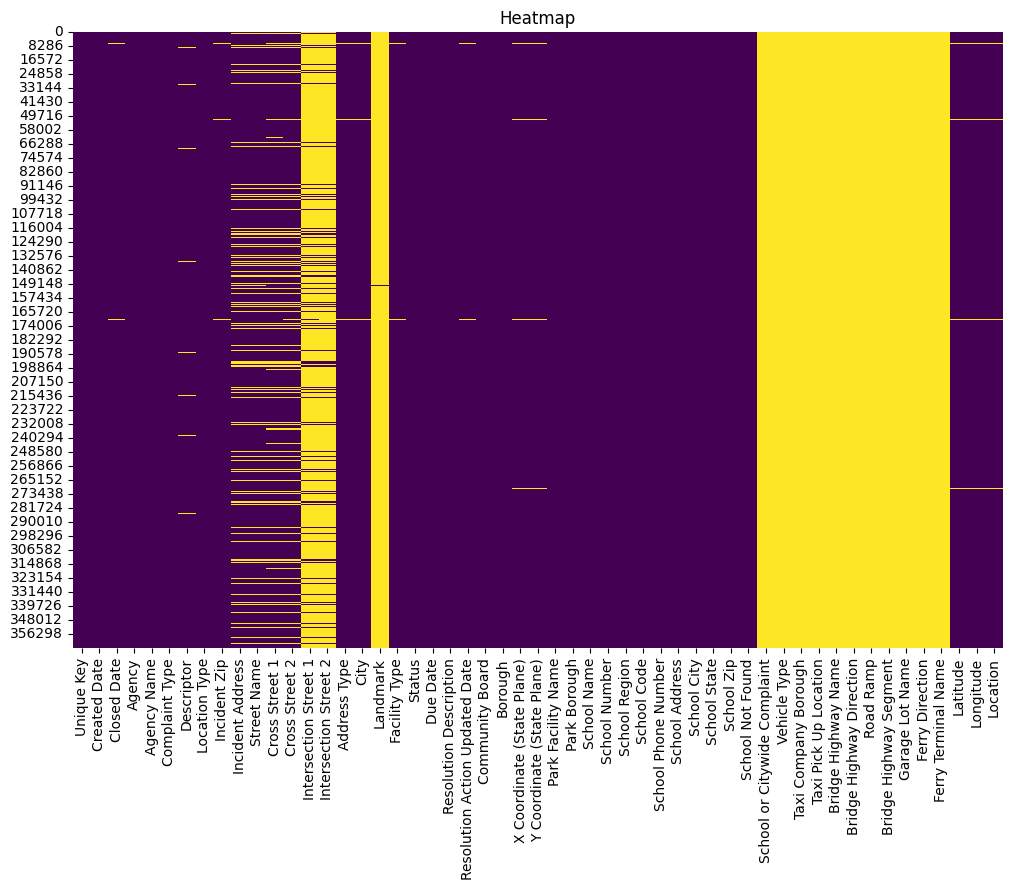

In [95]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Heatmap')
plt.show()

#lest start treat the data

In [65]:
#treat null values with drop columns that dont have at least 60% of valid values
#a column without much data cannot be studied
percent = 60
num_nulls = len(df) * (percent / 100)
df_new = df.dropna(thresh=num_nulls, axis=1)

null_variables2 = df_new.isnull().sum()
print( null_variables2[null_variables2 > 0])

Closed Date                        2381
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Facility Type                      2389
Due Date                              3
Resolution Action Updated Date     2402
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
School Region                         1
School Code                           1
School Zip                            1
Latitude                           4030
Longitude                          4030
Location                           4030
dtype: int64


In [97]:
#now lets fill null values with  apropried word for apropied field
#all these columns can be important for studying all categorical data so calculations cannot be made to solve them
df_new['Incident Address'] = df_new['Incident Address'].fillna('NO SOURCE')
df_new['Street Name'] = df_new['Incident Address'].fillna('NO SOURCE')
df_new['Cross Street 1'] = df_new['Incident Address'].fillna('NO SOURCE')
df_new['Cross Street 2'] = df_new['Incident Address'].fillna('NO SOURCE')
df_new['Descriptor'] = df_new['Descriptor'].fillna('N/A')
df_new['Location Type'] = df_new['Location Type'].fillna('NO SOURCE')
df_new['Incident Zip'] = df_new['Incident Zip'].fillna('N/A')
df_new['Facility Type'] = df_new['Facility Type'].fillna('N/A')
df_new['Address Type'] = df_new['Address Type'].fillna('N/A')
df_new['Resolution Action Updated Date'] = df_new['Resolution Action Updated Date'].fillna('NOT CLOSEH YET')

In [98]:
#resolving missing data with pad or bfill depending on the mode in the dataset
column_data = 'Closed Date'
df_new[column_data] = pd.to_datetime(df_new[column_data], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df_new[column_data].fillna(method='pad', inplace=True)

column_data2 = 'Due Date'
df_new[column_data2] = pd.to_datetime(df_new[column_data2], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df_new[column_data2].fillna(method='bfill', inplace=True)


In [89]:
#lastly, resolving null values with drop rows that do not have city or location because without such data it would be difficult to study than
column_especific = 'City'
column_especific4 = 'Location'
df_new = df_new.dropna(subset=[column_especific])
df_new = df_new.dropna(subset=[column_especific4])

In [99]:
null_variables3 = df_new.isnull().sum()
print( null_variables3[null_variables3 > 0])

Series([], dtype: int64)


#'#######################################'

#cleaning data end

#'#######################################'

#step 2 Draw a frequency plot for city-wise complaints

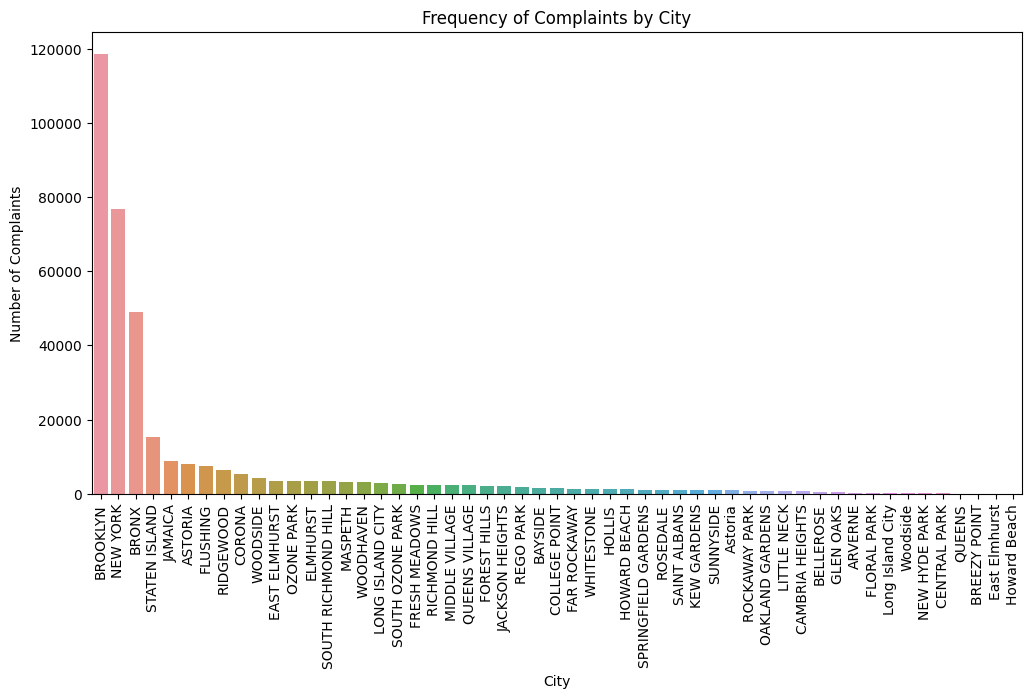

In [100]:
# Specifying the city column
column_city = 'City'
# Creating a frequency graph for complaints by city
plt.figure(figsize=(12, 6))
sns.countplot(x=column_city, data=df_new, order=df_new[column_city].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frequency of Complaints by City')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.show()

#'#######################################'
#Step 2 end

#'#######################################'

#3.Draw scatter and hexbin plots for complaint concentration across Brooklyn

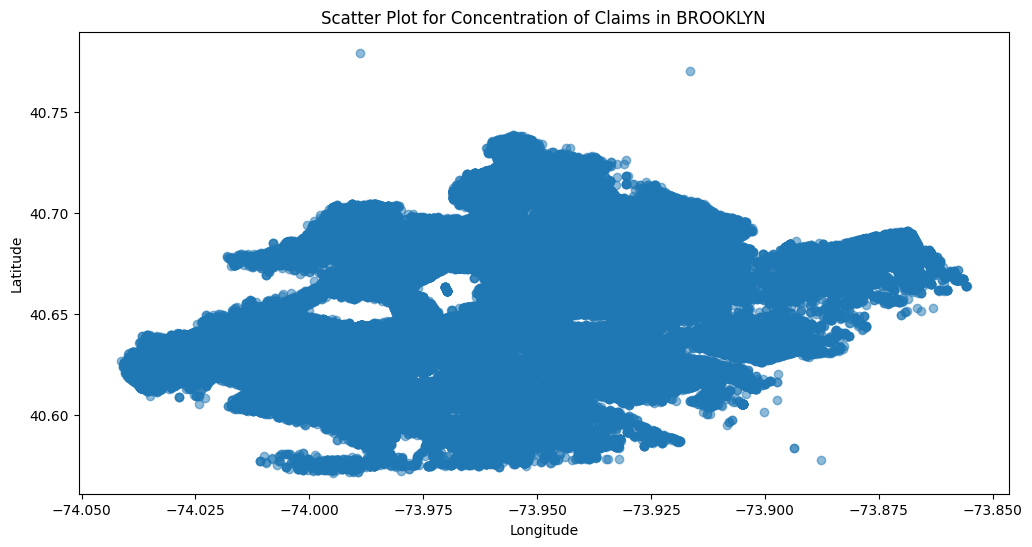

In [102]:
# Specifying the latitude and longitude column (assume you have these columns))
latitude = 'Latitude'
longitude = 'Longitude'
# Filtering the data for complaints in Brooklyn
df_brooklyn = df_new[df_new['City'] == 'BROOKLYN']
# Creating a scatter plot for complaints in Brooklyn
plt.figure(figsize=(12, 6))
plt.scatter(df_brooklyn[longitude], df_brooklyn[latitude], alpha=0.5)
plt.title('Scatter Plot for Concentration of Claims in BROOKLYN')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


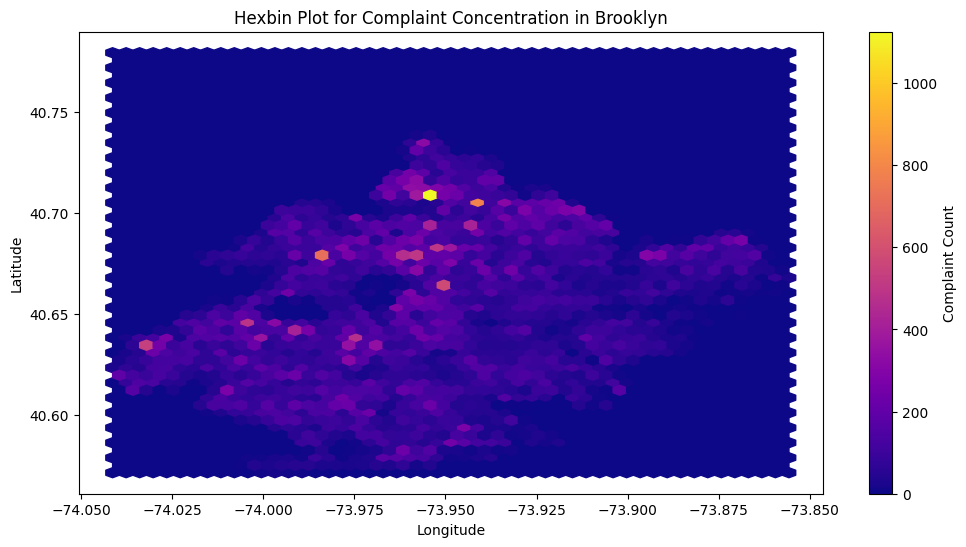

In [108]:
# Creating a hexbin graph for complaints in Brooklyn
plt.figure(figsize=(12, 6))
plt.hexbin(df_brooklyn[longitude], df_brooklyn[latitude], gridsize=50, cmap='plasma')
plt.title('Hexbin Plot for Complaint Concentration in Brooklyn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Complaint Count')
plt.show()

#'#######################################'
#Step 3 end

#'#######################################'

4. Find major types of complaints:

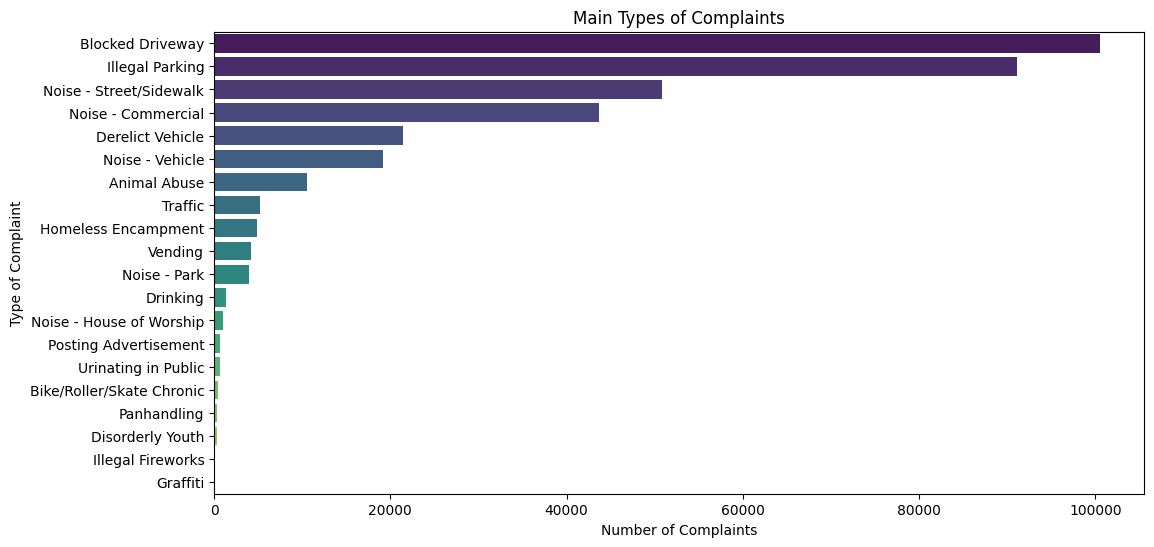

In [112]:
#	Plot a bar graph of count vs. complaint types

# Specifying the claim types column
Complaint_Type = 'Complaint Type'

# Finding the main types of complaints
Top_complaints = df_new[Complaint_Type].value_counts().head(20)

# Creating a bar chart for count vs. complaint types
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_complaints.values, y=Top_complaints.index, palette='viridis')
plt.title('Main Types of Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Type of Complaint')
plt.show()

In [113]:
# Finding the top 10 types of complaints
top_10_complaints = df_new[Complaint_Type].value_counts().head(10)
print("Top 10 Types of Complaints:")
print(top_10_complaints)

Top 10 Types of Complaints:
Blocked Driveway           100502
Illegal Parking             91100
Noise - Street/Sidewalk     50814
Noise - Commercial          43644
Derelict Vehicle            21432
Noise - Vehicle             19127
Animal Abuse                10503
Traffic                      5168
Homeless Encampment          4829
Vending                      4165
Name: Complaint Type, dtype: int64


In [116]:
#3.	Display the types of complaints in each city in a separate dataset

# Creating a dictionary to store separate DataFrames for each city
datasets_by_city = {}

# Iterating over unique cities
for City in df_new[column_city].unique():
    # Creating a DataFrame for each city
    df_cities = df_new[df_new[column_city] == City]
    # Extracting the types of complaints for the specific city
    Complaint_Type_city = df_cities[Complaint_Type].value_counts().index[:3]
    # Storing complaint types in a dictionary
    datasets_by_city[City] = pd.DataFrame({'Complaint Type': Complaint_Type_city})

# Displaying the separate datasets for each city
for City, dataset in datasets_by_city.items():
    print(f"\nTypes of Complaints in {City}:\n")
    print(dataset)


Types of Complaints in NEW YORK:

            Complaint Type
0  Noise - Street/Sidewalk
1       Noise - Commercial
2          Illegal Parking

Types of Complaints in ASTORIA:

       Complaint Type
0    Blocked Driveway
1  Noise - Commercial
2     Illegal Parking

Types of Complaints in BRONX:

            Complaint Type
0         Blocked Driveway
1          Illegal Parking
2  Noise - Street/Sidewalk

Types of Complaints in ELMHURST:

            Complaint Type
0         Blocked Driveway
1          Illegal Parking
2  Noise - Street/Sidewalk

Types of Complaints in BROOKLYN:

            Complaint Type
0         Blocked Driveway
1          Illegal Parking
2  Noise - Street/Sidewalk

Types of Complaints in KEW GARDENS:

       Complaint Type
0    Blocked Driveway
1     Illegal Parking
2  Noise - Commercial

Types of Complaints in JACKSON HEIGHTS:

       Complaint Type
0    Blocked Driveway
1  Noise - Commercial
2     Illegal Parking

Types of Complaints in MIDDLE VILLAGE:

     Complai

#'#######################################'
#Step 4 end

#'#######################################'

#5. Visualize the major types of complaints in each city

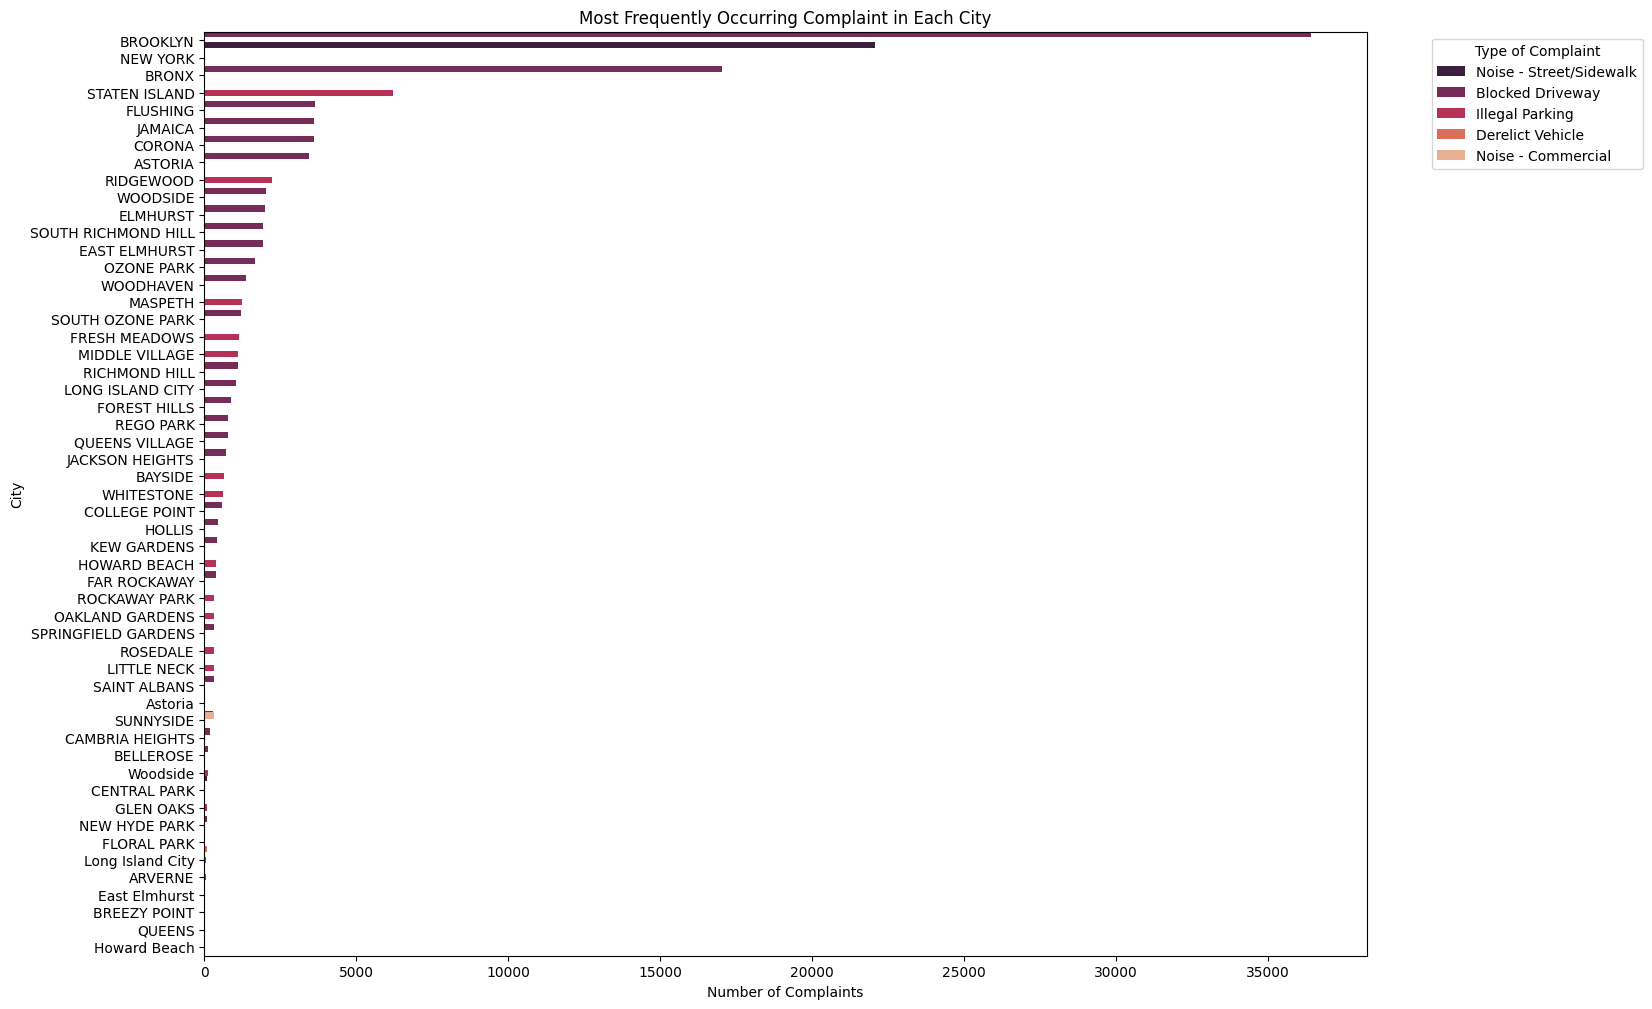

In [139]:
plt.figure(figsize=(15, 12))
sns.countplot(y=column_city, hue='Complaint Type', data=df_most_frequent,
              order=df_most_frequent[column_city].value_counts().index, palette='rocket', width=1.8)
plt.title('Most Frequently Occurring Complaint in Each City')
plt.xlabel('Number of Complaints')
plt.ylabel('City')
plt.legend(title='Type of Complaint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#'#######################################'
#Step 5 end

#'#######################################'

# 6. Check if the average response time across various types of complaints

In [142]:
# Converting date columns to datetime format
df_new['Created Date'] = pd.to_datetime(df_new['Created Date'])
df_new['Closed Date'] = pd.to_datetime(df_new['Closed Date'])

# Calculating response time (difference between Created Date and Closed Date)
df_new['Response Time'] = (df_new['Closed Date'] - df_new['Created Date']).dt.total_seconds() / (60 * 60)  # em horas

In [143]:
# Calculating the average response time for each type of complaint
average_response_time = df_new.groupby('Complaint Type')['Response Time'].mean().reset_index()


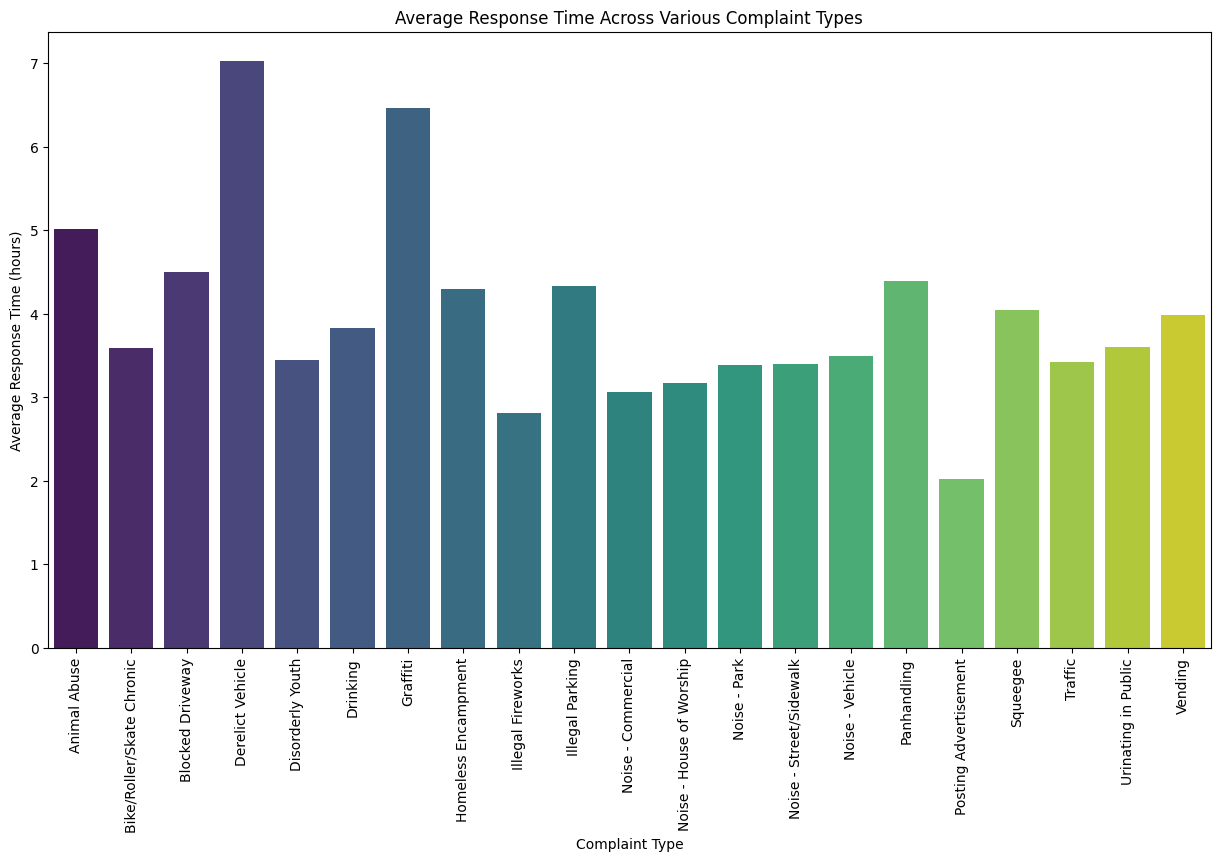

In [144]:
# Creating a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Complaint Type', y='Response Time', data=average_response_time, palette='viridis')
plt.title('Average Response Time Across Various Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time (hours)')
plt.xticks(rotation=90)
plt.show()

#'#######################################'
#Step 6 end

#'#######################################'

#6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [147]:
# Selecting the categorical variables you want to analyze
categorical_columns = ['Complaint Type', 'Agency', 'Status', 'Location Type', 'Facility Type']

# Creating a contingency table for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df_new[col1], df_new[col2])

In [150]:
# Running the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

In [151]:
# Displaying the results
print(f"\nChi-square test for {col1} and {col2}:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")


Chi-square test for Facility Type and Facility Type:
Chi2 value: 57.759228888607026
P-value: 6.097250191161687e-07


In [152]:
# Assessing significance (cutoff value, such as 0.05)
if p < 0.05:
  print("Result is statistically significant. There is an association between the variables.")
else:
  print("Result is not statistically significant. There is no significant association between the variables.")

Result is statistically significant. There is an association between the variables.


#'#######################################'
#Project finish, Thank you so much for the attencion

#'#######################################'

Project Conclusion: Service Complaint Analysis in New York

Throughout this data analysis project, we explored a dataset containing information about (311) service complaints in New York. Let's summarize some of the main conclusions and steps taken:

Understanding the Dataset:

We identify the available columns, including information such as creation date, closing date, type of complaint, responsible agency, among others.
Data Pre-processing:

We perform data cleaning steps, such as identifying null values, removing unnecessary columns, and handling missing values.
Exploratory Data Analysis (EDA):

We explored the distribution of complaints by city, identifying the most frequent types of complaints and visualizing geographic patterns.
Average Response Time:

We calculate the average response time for different types of complaints using the creation and closing date columns.
Statistical Analysis (Optional):

We performed chi-square tests to evaluate the association between categorical variables, identifying possible significant relationships.
Graphic Views:

We create graphical visualizations, including bar charts for most frequent complaint types and scatter plots for geographic analysis.
Recommendations for Future Actions:

Based on the findings, we recommend investigating the most frequent complaints further, prioritizing geographic areas with the highest incidence.
Final considerations:

This project provided valuable understanding of patterns and trends in service complaints in New York. The statistical analysis highlighted possible associations between variables, guiding potential areas of improvement for the responsible bodies.